In [38]:
from langgraph.graph import StateGraph
from typing import TypedDict, List

In [67]:
class AgentState(TypedDict):
    """State for the agent."""
    num: List[int]
    name: str
    operator: str
    result: str

In [74]:
def exercise(state: AgentState):
    if state["operator"] == "+":
        result = f"Hi {state['name']}, your answer is {sum(state['num'])}"
    elif state["operator"] == "-":
        result = f"Hi {state['name']}, your answer is {state['num'][0] - sum(state['num'][1:])}"
    elif state["operator"] == "*":
        # Multiply all numbers together
        product = 1
        for num in state['num']:
            if num == 0:
                result = f"Hi {state['name']}, multiplication by zero is always zero"
                break
            product *= num
        result = f"Hi {state['name']}, your answer is {product}"
    elif state["operator"] == "/":
        # Divide first number by all subsequent numbers
        quotient = state['num'][0]
        for num in state['num'][1:]:
            if num == 0:
                result = f"Hi {state['name']}, division by zero is not allowed"
                break
            quotient /= num
        else:
            result = f"Hi {state['name']}, your answer is {quotient}"
    else:
        result = f"Hi {state['name']}, unsupported operator: {state['operator']}"
    
    # Return a dictionary with the state updates
    return {"result": result}


In [75]:
graph=StateGraph(AgentState)
graph.add_node("exercise", exercise)
graph.set_entry_point("exercise")
graph.set_finish_point("exercise")
app=graph.compile()

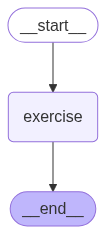

In [76]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [79]:
result=app.invoke({"num": [1, 0, 9], "name": "Alice", "operator": "*"})

In [80]:
result["result"]

'Hi Alice, your answer is 1'